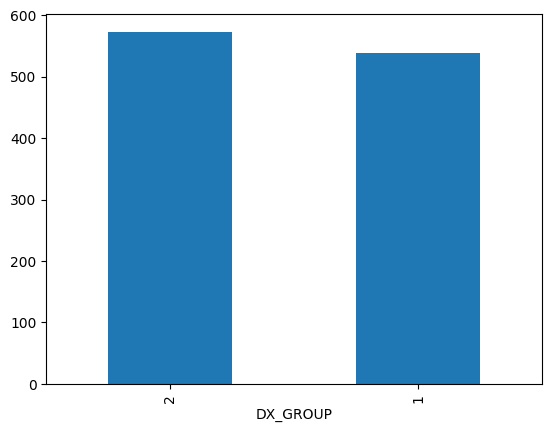

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pheno_data = pd.read_csv('../data/raw/Phenotypic_V1_0b_preprocessed1.csv')
pheno = pd.DataFrame(pheno_data)

# 1 = ASD, 2 = TD
pheno['DX_GROUP'] = pheno['DX_GROUP'].value_counts().plot.bar()

17


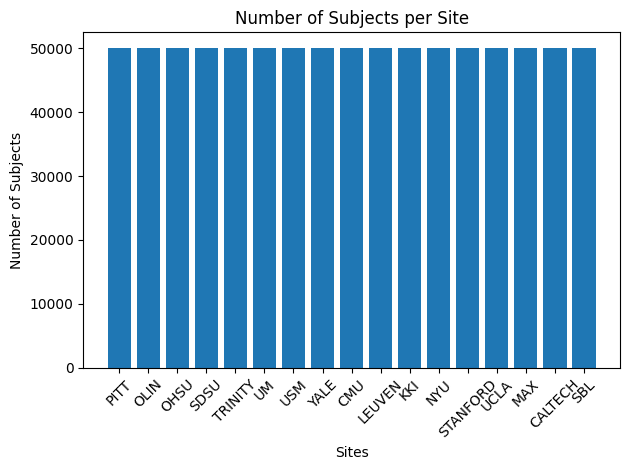

In [ ]:
# Sites plotted against num of subjects
site_codes = pheno['SITE_ID'].str.split('_').str[0]
sites = site_codes.unique()

idx = 0
subjects = []

for site in sites:
    if site_codes[idx] == site:
        subjects.append((pheno['subject'][idx])) 
    idx += 1

plt.bar(sites, subjects)
plt.xlabel('Sites')
plt.ylabel('Number of Subjects')
plt.title('Number of Subjects per Site')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

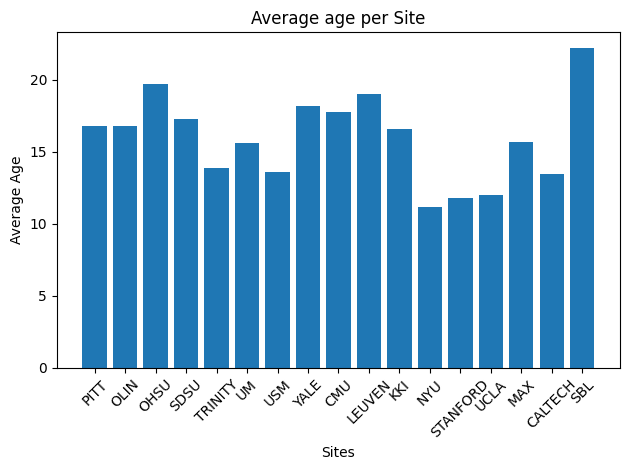

In [52]:
ages = []
prev_sites = set([])
prev_sites.add(site_codes[0])
idx = 1
prev_idx = 0
sum = pheno['AGE_AT_SCAN'][0]
ages.append(sum)

# sum of ages per site
for site in site_codes.sort_values()[1:]:
    if site not in prev_sites:
        ages.append(sum/(idx - prev_idx) if idx - prev_idx > 0 else 0)
        prev_sites.add(site)
        sum = 0
        prev_idx = idx
    sum += pheno['AGE_AT_SCAN'][idx]
    prev_site = site
    idx += 1


plt.bar(sites, ages)
plt.xlabel('Sites')
plt.ylabel('Average Age')
plt.title('Average age per Site')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()